# Exercícios: Aula 3 – Filtragem

## Estudante: João Carlos Pandolfi Santana
## Professor: Francisco Zampirolli

Obs.: Os algoritmos deverão ser desenvolvidos no ipython notebook e entregues de forma digital no tidia4 (sugestão: altere este arquivo ipynb). Um único arquivo para os 6 exercícios abaixo.

1. O arquivo “NoisyGull.pgm” contém uma imagem corrompida por ruídos. Desenvolva um algoritmo  que permita aplicar o filtro da média com kernel de tamanhos 2×2, 5×5, 10×10 e 20×20. Mostre o resultado de cada kernel aplicado e quantifique os resultados através do erro médio quadrático. 

Img Original


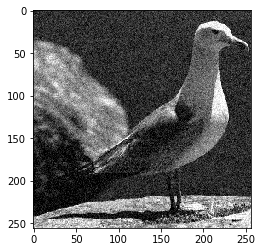

Filtered 2x2


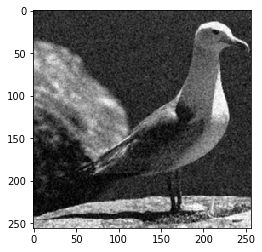

Filtered 5x5


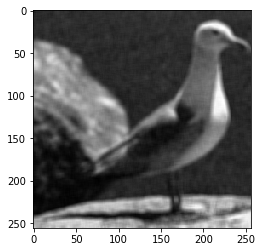

Filtered 10x10


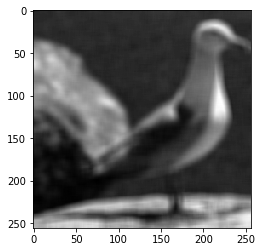

Filtered 20x20


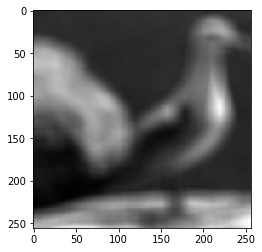

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def meanFilter(image,kx,ky):
    result = np.zeros(image.shape)
    x,y = image.shape
    
    kx = int(kx/2+.5)
    ky = int(ky/2+.5)
    # Percorrendo imagem
    for i in range(x):
        for j in range(y):
            #Recuperando batchs
            boundX1 = i - kx
            boundY1 = j - ky
            
            boundX2 = i + kx
            boundY2 = j + ky
            
            # se a borda estourar
            if(boundX1 <0):
                boundX1=0
            
            if(boundY1 < 0):
                boundY1 = 0
        
            if(boundX2 >= x):
                boundX2 = x-1
    
            if(boundY2 >= y):
                boundY2 = y-1
    
    
            # Otimizado
        
            result[i,j] = np.mean(image[boundX1:boundX2,boundY1:boundY2])

    
    return result
    
img1 = cv.imread("images/NoisyGull.pgm",0)

print("Img Original")
plt.imshow(img1,"gray")
plt.show()

f2x2 = meanFilter(img1,2,2)
f5x5 = meanFilter(img1,5,5)
f10x10 = meanFilter(img1,10,10)
f20x20 = meanFilter(img1,20,20)

print("Filtered 2x2")
plt.imshow(f2x2,"gray")
plt.show()

print("Filtered 5x5")
plt.imshow(f5x5,"gray")
plt.show()

print("Filtered 10x10")
plt.imshow(f10x10,"gray")
plt.show()

print("Filtered 20x20")
plt.imshow(f20x20,"gray")
plt.show()


2. Utilizando a mesma imagem, “NoisyGull.pgm”, desenvolva um algoritmo para o filtro mediano com kernel de tamanho 3×3, 5×5 e 7×7. Apresente os resultados e quantifique-os através do erro médio quadrático.

Img Original


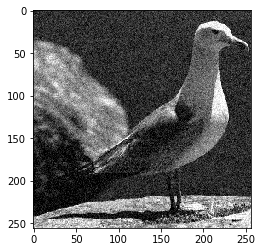

Filtered 3x3


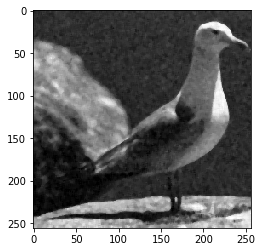

Filtered 5x5


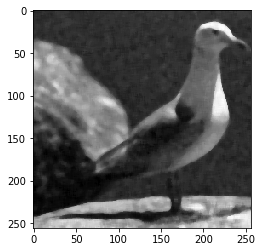

Filtered 7x7


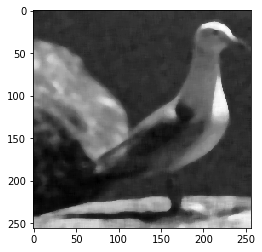

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def meanFilter(image,kx,ky):
    result = np.zeros(image.shape)
    x,y = image.shape
    
    kx = int(kx/2+.5)
    ky = int(ky/2+.5)
    # Percorrendo imagem
    for i in range(x):
        for j in range(y):
            #Recuperando batchs
            boundX1 = i - kx
            boundY1 = j - ky
            
            boundX2 = i + kx
            boundY2 = j + ky
            
            # se a borda estourar
            if(boundX1 <0):
                boundX1=0
            
            if(boundY1 < 0):
                boundY1 = 0
        
            if(boundX2 >= x):
                boundX2 = x-1
    
            if(boundY2 >= y):
                boundY2 = y-1
    
    
            # Otimizado
        
            result[i,j] = np.median(image[boundX1:boundX2,boundY1:boundY2])
          
    return result
    
img1 = cv.imread("images/NoisyGull.pgm",0)

print("Img Original")
plt.imshow(img1,"gray")
plt.show()

f3x3 = meanFilter(img1,3,3)
f5x5 = meanFilter(img1,5,5)
f7x7 = meanFilter(img1,7,7)

print("Filtered 3x3")
plt.imshow(f3x3,"gray")
plt.show()

print("Filtered 5x5")
plt.imshow(f5x5,"gray")
plt.show()

print("Filtered 7x7")
plt.imshow(f7x7,"gray")
plt.show()


3. Calcule a filtragem espacial para a seguinte imagem:

Imagem
        
0	1	2	3	5

1	2	3	5	7

2	3	5	7	8

3	5	7	8	9

5	7	8	9	10

Kernel
        
1	1	1

1	2	1

1	1	1


Img Original


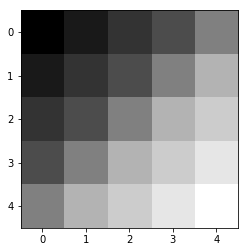

Img Filtered


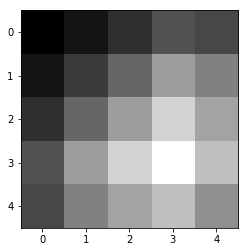

[[ 4. 10. 18. 28. 25.]
 [10. 21. 34. 50. 42.]
 [18. 34. 50. 66. 52.]
 [28. 50. 66. 79. 60.]
 [25. 42. 52. 60. 46.]]


In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

def spacialFilter(image,k):
    result = np.zeros(image.shape)
    x,y = image.shape
    kx,ky = k.shape
    tempImg = np.zeros((x+kx,y+ky))
    kx = int(kx/2)
    ky = int(ky/2)
    
    x,y = tempImg.shape
    
    tempImg[kx:-(kx+1),ky:-(ky+1)] = image
    
    # Percorrendo imagem
    for i in range(kx,x-kx-1):
        for j in range(ky,y-ky-1):
            #Recuperando batchs
            boundX1 = i - kx
            boundY1 = j - ky
            
            boundX2 = i + kx
            boundY2 = j + ky
            
            
            # Otimizado
            product = tempImg[boundX1:boundX2+1,boundY1:boundY2+1] * k
            result[i-kx,j-ky] = np.sum(product)
          
    return result
    
img1 = np.array([[0,1,2,3,5],[1,2,3,5,7],[2,3,5,7,8],[3,5,7,8,9],[5,7,8,9,10]])

kernel = np.array([[1,1,1],[1,2,1],[1,1,1]])


print("Img Original")
plt.imshow(img1,"gray")
plt.show()

filtered = spacialFilter(img1,kernel)

print("Img Filtered")
plt.imshow(filtered,"gray")
plt.show()

print(filtered)


4. Implemente um algoritmo do filtro Sobel pela combinação de kernel nas direções x e y. Aplique sobre diferentes imagens e observe os resultados. Em seguida, implemente o filtro Laplaciano usando um dos kernels apresentados. Aplique-o sobre as mesmas imagens usadas para o filtro Sobel e observe os resultados. Finalmente, discuta as diferenças entre as técnicas.

Img Original


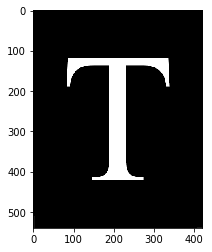

Img Sobel Filtered


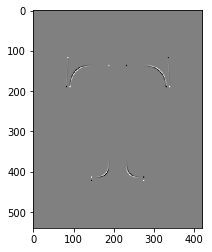

Img Lapacian Filtered


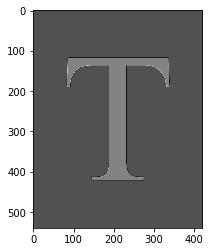

Img Original


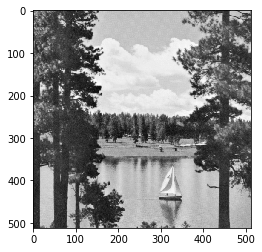

Img Sobel Filtered


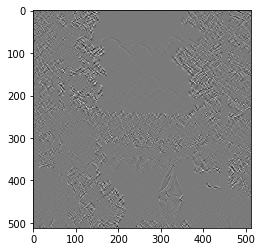

Img Lapacian Filtered


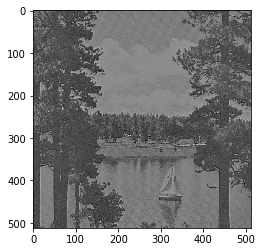

Img Original


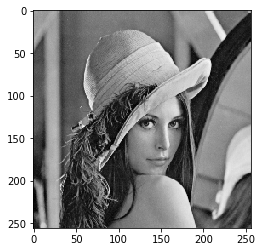

Img Sobel Filtered


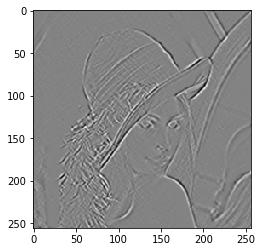

Img Lapacian Filtered


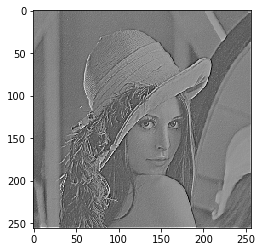

Img Original


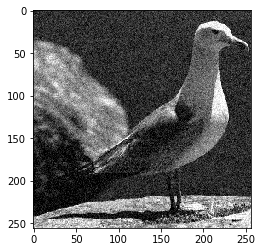

Img Sobel Filtered


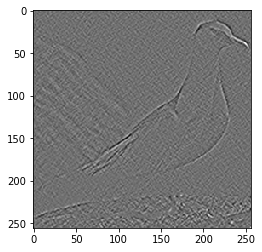

Img Lapacian Filtered


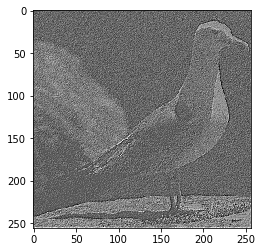

In [4]:
k_sobelX = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
k_sobelY = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

k_laplacian = np.array([[-1,-1,1],[-1,8,-1],[-1,-1,-1]])

images = ["Fig0236(a)(letter_T).tif","lake.tif","lena_gray_256.tif","NoisyGull.pgm"]

# Sobel
for path in images:
    img1 = cv.imread("images/"+path,0)

    print("Img Original")
    plt.imshow(img1,"gray")
    plt.show()


    img_sobelX = spacialFilter(img1,k_sobelX)
    img_sobelY = spacialFilter(img_sobelX,k_sobelY)


    print("Img Sobel Filtered")
    plt.imshow(img_sobelY,"gray")
    plt.show()

    img_laplacian = spacialFilter(img1,k_laplacian)

    print("Img Lapacian Filtered")
    plt.imshow(img_laplacian,"gray")
    plt.show()

    '''
    Filtro de sobel pega bem os contornos dos objetos na imagem, enquanto o fitro lapaciano destaca o objeto em si
    '''


5. Implemente um algoritmo para equalizar uma imagem retornando-a equalizada. Aplique sobre um conjunto de imagens. NÃO UTILIZE FUNÇÕES PRONTAS.

Img Original


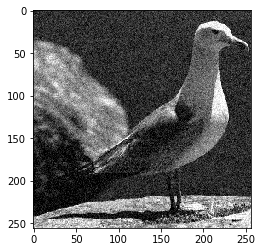

Img Normalizada


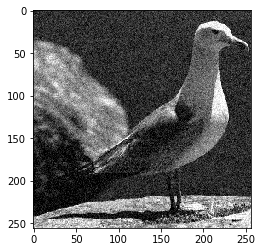

Img Original


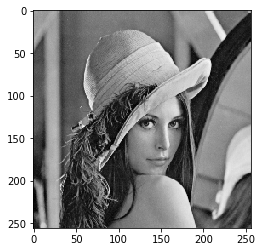

Img Normalizada


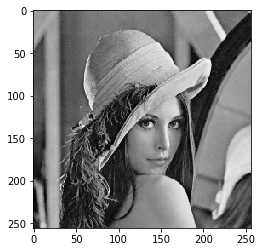

Img Original


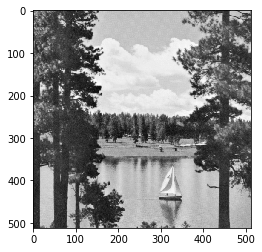

Img Normalizada


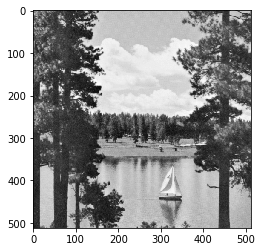

In [5]:
# sua solução

def getMinAndMax(image):
    x,y = image.shape
    vmax = 0
    vmin = 999
    # Percorrendo imagem
    for i in range(x):
        for j in range(y):
            if(image[i,j]> vmax):
                vmax = image[i,j]
            if(image[i,j]< vmin):
                vmin = image[i,j]

    return vmin,vmax

def normalize(image):
    x,y = image.shape
    result = np.zeros(image.shape)
    vmin,vmax = getMinAndMax(image)
    # Percorrendo imagem
    for i in range(x):
        for j in range(y):
            result[i,j] = round(vmax* ((image[i,j]-vmin)/(vmax-vmin)))

    return result    
            
    
images = ["NoisyGull.pgm","lena_gray_256.tif","lake.tif"]

for path in images:
    img1 = cv.imread("images/"+path,0)

    print("Img Original")
    plt.imshow(img1,"gray")
    plt.show()

    result = normalize(img1)

    print("Img Normalizada")
    plt.imshow(result,"gray")
    plt.show()


#round((2^b -1) * (atual-min/max-min))

6. Apresente uma solução (algoritmo) para recuperar as informações espaciais (coordenadas (x,y)) de um histograma de uma imagem em níveis de cinza M×N.

Img Original


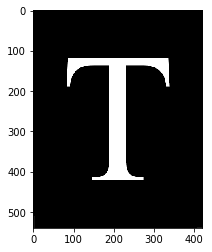

Niveis de cinza
dict_keys([0, 121, 190, 71, 168, 255, 98, 179, 109, 191, 120, 202, 131, 214, 141, 226, 151, 236, 162, 248, 173, 184, 195, 52, 205, 64, 216, 74, 227, 86, 237, 143, 245, 228, 212, 196, 163, 149, 139, 135, 126, 117, 113, 108, 104, 128, 235, 105, 124, 152, 174, 185, 197, 254, 60, 155, 240, 207, 106, 73, 61, 224, 63, 95, 161, 231, 166, 102, 59, 181, 241, 82, 178, 203, 77, 201, 92, 189, 250, 165, 68, 54, 229, 200, 252, 167, 213, 94, 215, 242, 238, 209, 56, 146, 246, 160, 110, 156, 125, 57, 217, 249, 101, 186, 93, 188, 99, 158, 199, 116, 210, 84, 220, 222, 107, 119, 91, 88, 253, 130, 140, 129, 208, 153, 164, 176, 233, 75, 198, 239, 97, 138, 219, 118, 76, 218, 150, 62, 171, 182, 193, 83, 204, 225, 114, 244, 148, 137, 58, 69, 79, 80, 180, 144, 112, 243, 122, 72, 133, 111, 55, 211, 234, 169, 251, 127, 175, 223, 183, 96, 65, 78, 103, 232, 81, 172, 230, 136, 115, 157, 7, 3, 25, 11, 1, 21])


In [6]:

def coordHistogram(image):
    result = {}
    x,y = image.shape
    
    # Percorrendo imagem
    for i in range(x):
        for j in range(y):
            color = image[i,j]
            if(color in result.keys()):
                result[color].append([i,j])
            else:
                result[color] = [[i,j]]
          
    return result

img1 = cv.imread("images/Fig0236(a)(letter_T).tif",0)
print("Img Original")
plt.imshow(img1,"gray")
plt.show()

coord = coordHistogram(img1)

# debug
print("Niveis de cinza")
print(coord.keys())
#for key in coord.keys():
#    print(coord[key])